# 💻 Aggregering av data

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/GMGI221-2024/forelesninger/blob/main/10_aggregering_av_data.ipynb)

Dataaggregering refererer til en prosess der vi kombinerer data i grupper. Når
vi gjør romlig dataaggregering, slår vi geometriene sammen til grovere
enheter (basert på noen attributter), og kan også beregne sammendragsstatistikk for
disse kombinerte geometriene fra de opprinnelige, mer detaljerte verdiene. For eksempel,
anta at vi er interessert i å studere kontinenter, men vi har bare
landnivådata som datsettet for land; Hvis vi aggregerer dataene etter
kontinent, vil vi konvertere dataene på landsnivå til et datasett på
kontinentnivå.

I denne opplæringen vil vi aggregere befolkningsdataene våre i Ås, dvs. rutenettcellene som har samme antall innbyggere vil bli slått sammen.

La oss starte med å laste `intersection.gpkg`, utdatafilen fra
[tidligere](#08_overlay):

In [1]:
import pathlib 
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_MAPPE = NOTEBOOK_PATH / "data"

In [3]:
import geopandas
intersection = geopandas.read_file(DATA_MAPPE / "intersection.gpkg")

For å gjøre aggregeringen vil vi bruke en metode som heter `dissolve()` som tar
som inngang kolonnen som vil bli brukt til å utføre aggregeringen:

In [4]:
# Utføre aggregeringen
dissolved = intersection.dissolve(by="pop_tot")

# Hva fikk vi
dissolved.head()

,geometry,ru250m,gml_id,lokalId,navnerom,versjonId,oppdateringsdato,gyldigFra,datauttaksdato,navn,språk,kommunenummer,kommunenavn,samiskForvaltningsområde
pop_tot,,,,,,,,,,,,,,
1,"MULTIPOLYGON (((261225.860 6618040.140, 261183...",22605006626000,kommune.28,d285e9c4-8da0-4dfc-b927-31ba7ee17e6a,https://data.geonorge.no/sosi/inndelinger/innd...,3,2023-11-28T16:00:22,2024-01-01,2024-03-04T12:27:57,Ås,nor,3218,Ås,False
2,"MULTIPOLYGON (((260250.000 6618500.000, 260250...",22650006625250,kommune.28,d285e9c4-8da0-4dfc-b927-31ba7ee17e6a,https://data.geonorge.no/sosi/inndelinger/innd...,3,2023-11-28T16:00:22,2024-01-01,2024-03-04T12:27:57,Ås,nor,3218,Ås,False
3,"MULTIPOLYGON (((260000.000 6619250.000, 260250...",22617506625250,kommune.28,d285e9c4-8da0-4dfc-b927-31ba7ee17e6a,https://data.geonorge.no/sosi/inndelinger/innd...,3,2023-11-28T16:00:22,2024-01-01,2024-03-04T12:27:57,Ås,nor,3218,Ås,False
4,"MULTIPOLYGON (((262000.000 6618000.000, 262000...",22602506625750,kommune.28,d285e9c4-8da0-4dfc-b927-31ba7ee17e6a,https://data.geonorge.no/sosi/inndelinger/innd...,3,2023-11-28T16:00:22,2024-01-01,2024-03-04T12:27:57,Ås,nor,3218,Ås,False
5,"MULTIPOLYGON (((261079.690 6617980.860, 261078...",22650006625500,kommune.28,d285e9c4-8da0-4dfc-b927-31ba7ee17e6a,https://data.geonorge.no/sosi/inndelinger/innd...,3,2023-11-28T16:00:22,2024-01-01,2024-03-04T12:27:57,Ås,nor,3218,Ås,False


La oss sammenligne antall celler i lagene før og etter aggregeringen:

In [5]:
print(f"Rader i opprinnelig intersection GeoDataFrame: {len(intersection)}")
print(f"Rader i oppløst lag: {len(dissolved)}")

Rader i opprinnelig intersection GeoDataFrame: 636
Rader i oppløst lag: 142


Faktisk har antall rader i dataene våre blitt redusert og polygonene har blitt
slått sammen.

Hva skjedde egentlig her? La oss ta en nærmere titt. 

La oss se hvilke kolonner vi nå har i vår GeoDataFrame:

In [6]:
dissolved.columns

Index(['geometry', 'ru250m', 'gml_id', 'lokalId', 'navnerom', 'versjonId',
       'oppdateringsdato', 'gyldigFra', 'datauttaksdato', 'navn', 'språk',
       'kommunenummer', 'kommunenavn', 'samiskForvaltningsområde'],
      dtype='object')

Som vi kan se, kan ikke kolonnen som vi brukte for å utføre aggregeringen
(`pop_tot`) finnes lenger i kolonnelisten. Hva skjedde med
den?

La oss ta en titt på indeksene i vår GeoDataFrame:

In [7]:
dissolved.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       250, 256, 261, 278, 284, 297, 300, 344, 368, 379],
      dtype='int64', name='pop_tot', length=142)

Aha! Vel nå forstår vi hvor kolonnen vår gikk. Den brukes nå som indeks i
vår `dissolved` GeoDataFrame. 

Nå kan vi for eksempel bare velge slike geometrier fra laget som har for
eksempel nøyaktig 15 innbyggere:

In [15]:
# Velg bare geometrier som har 15 innbyggere
dissolved.loc[15]

pop_tot                                                                    16
geometry                    MULTIPOLYGON (((266500.00000573305 6618499.999...
ru250m                                                         22652506625250
gml_id                                                             kommune.28
lokalId                                  d285e9c4-8da0-4dfc-b927-31ba7ee17e6a
navnerom                    https://data.geonorge.no/sosi/inndelinger/innd...
versjonId                                                                   3
oppdateringsdato                                          2023-11-28T16:00:22
gyldigFra                                                          2024-01-01
datauttaksdato                                            2024-03-04T12:27:57
navn                                                                       Ås
språk                                                                     nor
kommunenummer                                                   

In [9]:
# Se datatype
type(dissolved.loc[15])

pandas.core.series.Series

Som vi kan se, har vi nå som et resultat et Pandas `Series` objekt som inneholder
i utgangspunktet en rad fra vår opprinnelige aggregerte GeoDataFrame.

La oss også visualisere disse 15 innbyggere-rutenettcellene.

Først må vi konvertere den valgte raden tilbake til en GeoDataFrame:

In [10]:
# Lag en GeoDataFrame
selection = geopandas.GeoDataFrame([dissolved.loc[15]], crs=dissolved.crs)

Plott utvalget på toppen av hele rutenettet:

<Axes: >

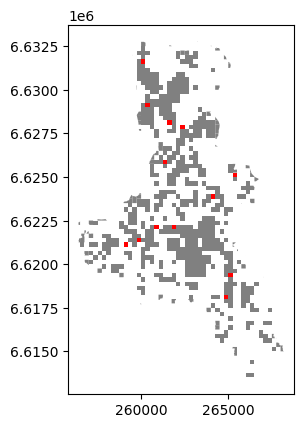

In [14]:
# Plott alle rutenettcellene, og rutenettcellene som har 15 innbyggere
ax = dissolved.plot(facecolor="gray")
selection.plot(ax=ax, facecolor="red")

En annen måte å visualisere reisetidene i hele GeoDataFrame på er å plott ved hjelp av en spesifikk kolonne. For å bruke vår `pop_tot` kolonne, som nå er indeksen i GeoDataFrame, må vi tilbakestille indeksen:

In [12]:
dissolved = dissolved.reset_index()
dissolved.head()

,pop_tot,geometry,ru250m,gml_id,lokalId,navnerom,versjonId,oppdateringsdato,gyldigFra,datauttaksdato,navn,språk,kommunenummer,kommunenavn,samiskForvaltningsområde
0,1,"MULTIPOLYGON (((261225.860 6618040.140, 261183...",22605006626000,kommune.28,d285e9c4-8da0-4dfc-b927-31ba7ee17e6a,https://data.geonorge.no/sosi/inndelinger/innd...,3,2023-11-28T16:00:22,2024-01-01,2024-03-04T12:27:57,Ås,nor,3218,Ås,False
1,2,"MULTIPOLYGON (((260250.000 6618500.000, 260250...",22650006625250,kommune.28,d285e9c4-8da0-4dfc-b927-31ba7ee17e6a,https://data.geonorge.no/sosi/inndelinger/innd...,3,2023-11-28T16:00:22,2024-01-01,2024-03-04T12:27:57,Ås,nor,3218,Ås,False
2,3,"MULTIPOLYGON (((260000.000 6619250.000, 260250...",22617506625250,kommune.28,d285e9c4-8da0-4dfc-b927-31ba7ee17e6a,https://data.geonorge.no/sosi/inndelinger/innd...,3,2023-11-28T16:00:22,2024-01-01,2024-03-04T12:27:57,Ås,nor,3218,Ås,False
3,4,"MULTIPOLYGON (((262000.000 6618000.000, 262000...",22602506625750,kommune.28,d285e9c4-8da0-4dfc-b927-31ba7ee17e6a,https://data.geonorge.no/sosi/inndelinger/innd...,3,2023-11-28T16:00:22,2024-01-01,2024-03-04T12:27:57,Ås,nor,3218,Ås,False
4,5,"MULTIPOLYGON (((261079.690 6617980.860, 261078...",22650006625500,kommune.28,d285e9c4-8da0-4dfc-b927-31ba7ee17e6a,https://data.geonorge.no/sosi/inndelinger/innd...,3,2023-11-28T16:00:22,2024-01-01,2024-03-04T12:27:57,Ås,nor,3218,Ås,False


Som vi kan se, har vi nå vår `pop_tot` som en kolonne igjen, og kan da plott GeoDataFrame ved å sende denne kolonnen ved hjelp av `column` parameteren:

<Axes: >

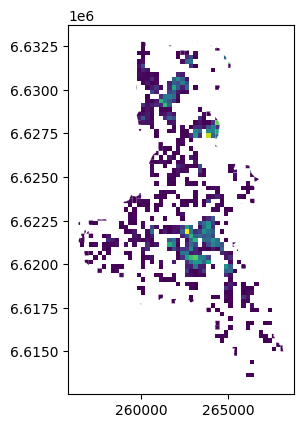

In [13]:
dissolved.plot(column="pop_tot")